In [1]:
from lib.models.tools.geometry import *
%matplotlib inline

In [2]:
# generate example data

r = 2.5  # radius
C = np.array([3, 3, 4])  # center
theta = 45 * np.pi / 180    # azimuth
phi = - 30 * np.pi / 180    # zenith

t = np.linspace(0, 2*np.pi, 180)
P_gen = generate_circle_by_angles(t, C, r, theta, phi)

## cluster of points
t = np.linspace(-np.pi, -0.25 * np.pi, 100)
n = len(t)
P = generate_circle_by_angles(t, C, r, theta, phi)

P += np.random.normal(size=P.shape) * 0.1



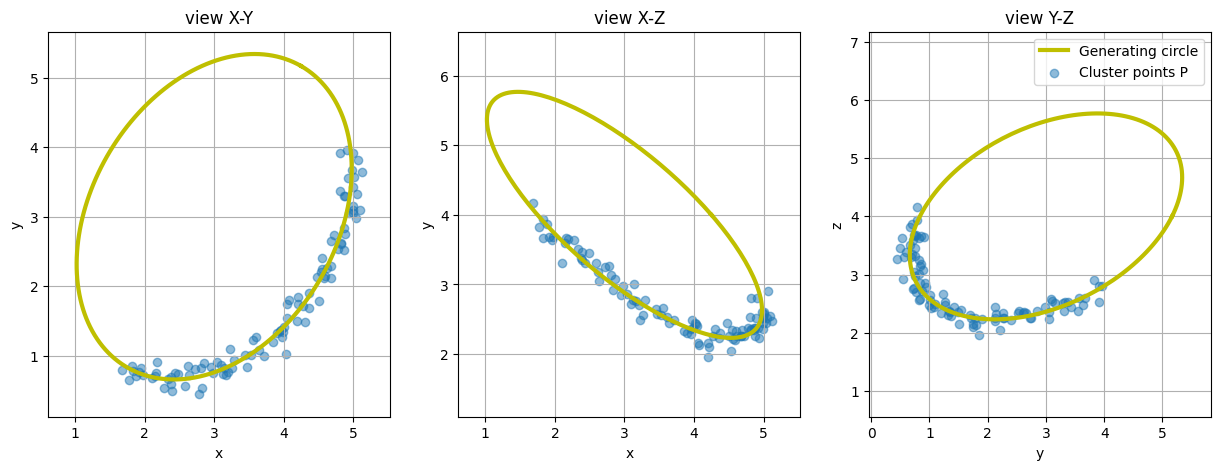

In [3]:
f, ax = plt.subplots(1, 3, figsize=(15, 5))
alpha_pts = 0.5
i = 0
ax[i].plot(P_gen[:, 0], P_gen[:, 1], 'y-', lw=3, label='Generating circle')
ax[i].scatter(P[:, 0], P[:, 1], alpha=alpha_pts, label='Cluster points P')
ax[i].set_title('view X-Y')
ax[i].set_xlabel('x')
ax[i].set_ylabel('y')
ax[i].set_aspect('equal', 'datalim')
ax[i].margins(.1, .1)
ax[i].grid()
i = 1
ax[i].plot(P_gen[:, 0], P_gen[:, 2], 'y-', lw=3, label='Generating circle')
ax[i].scatter(P[:, 0], P[:, 2], alpha=alpha_pts, label='Cluster points P')
ax[i].set_title('view X-Z')
ax[i].set_xlabel('x')
ax[i].set_ylabel('y')
ax[i].set_aspect('equal', 'datalim')
ax[i].margins(.1, .1)
ax[i].grid()
i = 2
ax[i].plot(P_gen[:, 1], P_gen[:, 2], 'y-', lw=3, label='Generating circle')
ax[i].scatter(P[:, 1], P[:, 2], alpha=alpha_pts, label='Cluster points P')
ax[i].set_title('view Y-Z')
ax[i].set_xlabel('y')
ax[i].set_ylabel('z')
ax[i].set_aspect('equal', 'datalim')
ax[i].margins(.1, .1)
ax[i].legend()
ax[i].grid()

[3.04121519 2.94950895 3.94573294]


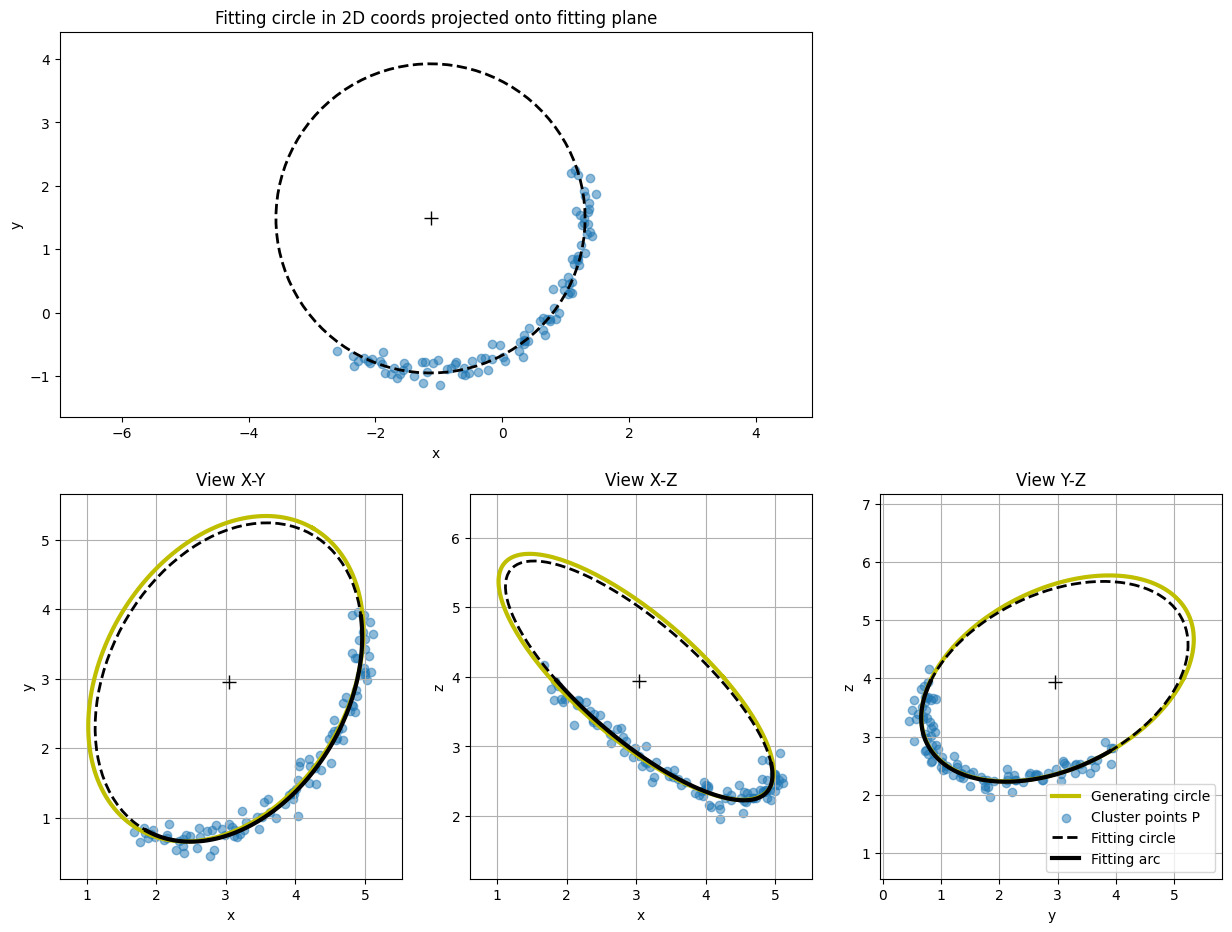

In [4]:
fig = plt.figure(figsize=(15, 11))
alpha_pts = 0.5
figshape = (2, 3)
ax = [None] * 4
ax[0] = plt.subplot2grid(figshape, loc=(0, 0), colspan=2)
ax[1] = plt.subplot2grid(figshape, loc=(1, 0))
ax[2] = plt.subplot2grid(figshape, loc=(1, 1))
ax[3] = plt.subplot2grid(figshape, loc=(1, 2))

i = 0
ax[i].set_title("Fitting circle in 2D coords projected onto fitting plane")
ax[i].set_xlabel('x')
ax[i].set_ylabel('y')
ax[i].set_aspect('equal', 'datalim')
ax[i].margins(.1, .1)
ax[i].grid()
i = 1
ax[i].plot(P_gen[:, 0], P_gen[:, 1], 'y-', lw=3, label='Generating circle')
ax[i].scatter(P[:, 0], P[:, 1], alpha=alpha_pts, label='Cluster points P')
ax[i].set_title('View X-Y')
ax[i].set_xlabel('x')
ax[i].set_ylabel('y')
ax[i].set_aspect('equal', 'datalim')
ax[i].margins(.1, .1)
ax[i].grid()
i = 2
ax[i].plot(P_gen[:, 0], P_gen[:, 2], 'y-', lw=3, label='Generating circle')
ax[i].scatter(P[:, 0], P[:, 2], alpha=alpha_pts, label='Cluster points P')
ax[i].set_title('View X-Z')
ax[i].set_xlabel('x')
ax[i].set_ylabel('z')
ax[i].set_aspect('equal', 'datalim')
ax[i].margins(.1, .1)
ax[i].grid()
i = 3
ax[i].plot(P_gen[:, 1], P_gen[:, 2], 'y-', lw=3, label='Generating circle')
ax[i].scatter(P[:, 1], P[:, 2], alpha=alpha_pts, label='Cluster points P')
ax[i].set_title('View Y-Z')
ax[i].set_xlabel('y')
ax[i].set_ylabel('z')
ax[i].set_aspect('equal', 'datalim')
ax[i].margins(.1, .1)
ax[i].grid()

n, d, P_centered = fit_plane(P)
P_xy = rodrigues_rot(P_centered, n, [0, 0, 1])

ax[0].scatter(P_xy[:, 0], P_xy[:, 1], alpha=alpha_pts, label='Projected points')

xc, yc, r = fit_circle_2d(P_xy[:, 0], P_xy[:, 1])

t = np.linspace(0, 2 * np.pi, 100)
xx = xc + r * np.cos(t)
yy = yc + r * np.sin(t)

ax[0].plot(xx, yy, 'k--', lw=2, label='Fitting circle')
ax[0].plot(xc, yc, 'k+', ms=10)
ax[0].grid()

C = rodrigues_rot(np.array([xc, yc, 0]), [0,0, 1], n) + P.mean(0)
C = C.flatten()
print(C)

# generate points for fitting circle 
t = np.linspace(0, 2*np.pi, 100)
u = P[0] -  C
P_fitcircle = generate_circle_by_vectors(t, C, r, n, u)

ax[1].plot(P_fitcircle[:, 0], P_fitcircle[:, 1], 'k--', lw=2, label='Fitting circle')
ax[2].plot(P_fitcircle[:, 0], P_fitcircle[:, 2], 'k--', lw=2, label='Fitting circle')
ax[3].plot(P_fitcircle[:, 1], P_fitcircle[:, 2], 'k--', lw=2, label='Fitting circle')
ax[3].legend()

# generate points for fitting arc
u = P[0] - C
v = P[-1] - C
theta = angle_between(u, v, n)

t = np.linspace(0, theta, 100)
P_fitarc = generate_circle_by_vectors(t, C, r, n, u)

ax[1].plot(P_fitarc[:, 0], P_fitarc[:, 1], 'k-', lw=3, label='Fitting arc')
ax[2].plot(P_fitarc[:, 0], P_fitarc[:, 2], 'k-', lw=3, label='Fitting arc')
ax[3].plot(P_fitarc[:, 1], P_fitarc[:, 2], 'k-', lw=3, label='Fitting arc')
ax[1].plot(C[0], C[1], 'k+', ms=10)
ax[2].plot(C[0], C[2], 'k+', ms=10)
ax[3].plot(C[1], C[2], 'k+', ms=10)
ax[3].legend()




In [5]:
def set_axes_equal_3d(ax):
    limits = np.array([ax.get_xlim3d(), ax.get_ylim3d(), ax.get_zlim3d()])
    spans = abs(limits[:,0] - limits[:,1])
    centers = np.mean(limits, axis=1)
    radius = 0.5 * max(spans)
    ax.set_xlim3d([centers[0]-radius, centers[0]+radius])
    ax.set_ylim3d([centers[1]-radius, centers[1]+radius])
    ax.set_zlim3d([centers[2]-radius, centers[2]+radius])
    

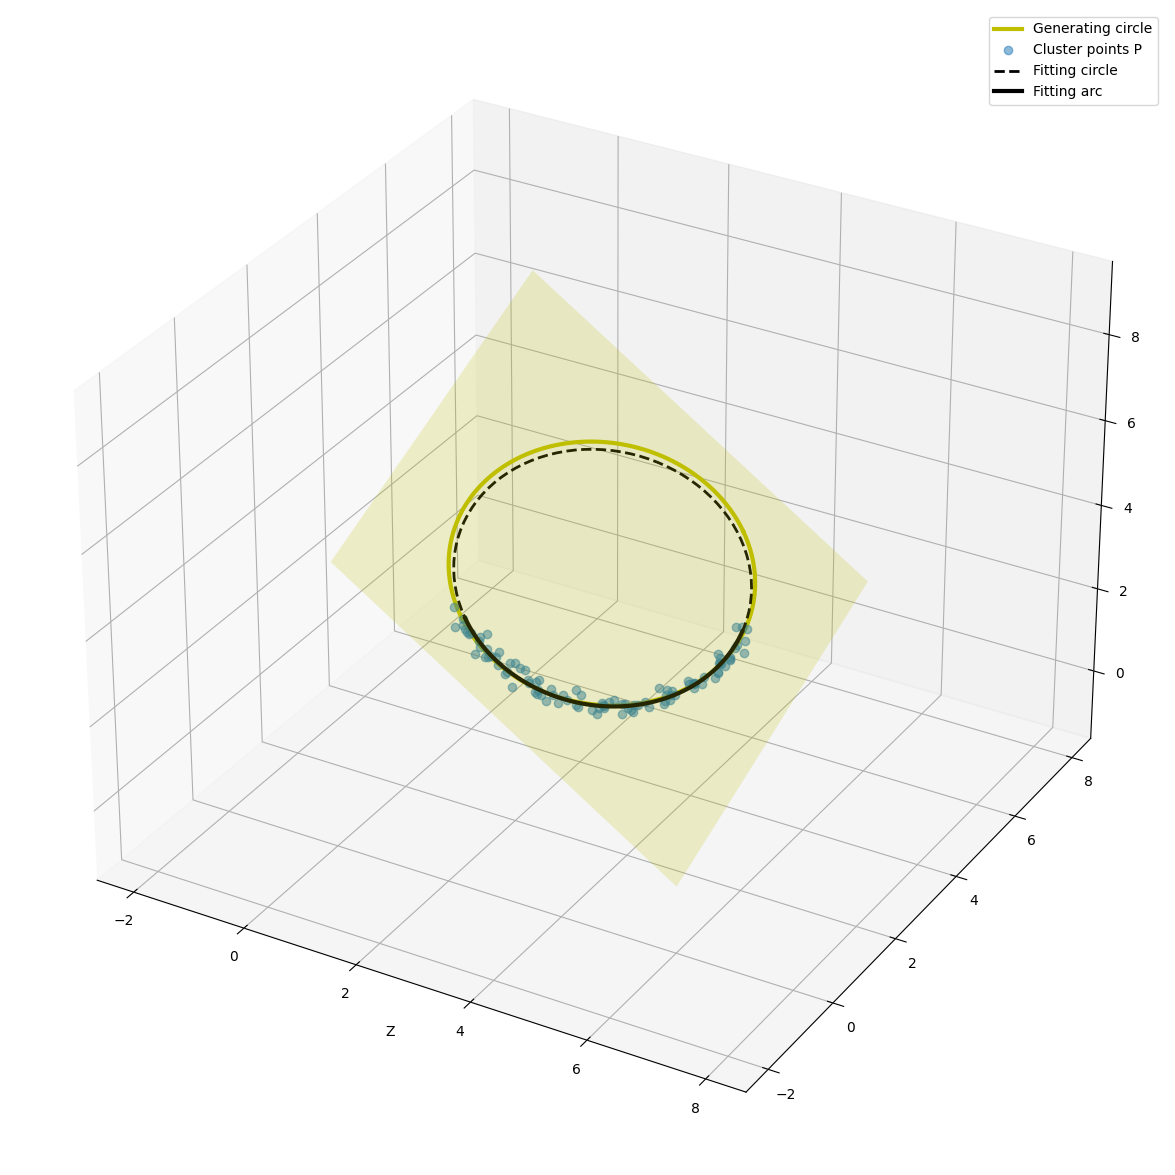

In [6]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(*P_gen.T, color='y', lw=3, label='Generating circle')
ax.plot(*P.T, ls='', marker='o', alpha=0.5, label='Cluster points P')

# plot fitting plane
xx, yy = np.meshgrid(np.linspace(0, 6, 11), np.linspace(0, 6, 11))
zz = (-n[0] * xx - n[1] * yy - d) / n[2]
ax.plot_surface(xx, yy, zz, rstride=2, cstride=2, color='y', alpha=0.2, shade=False)

# plot fitting circle
ax.plot(*P_fitcircle.T, color='k', ls='--', lw=2, label='Fitting circle')
ax.plot(*P_fitarc.T, color='k', ls='-', lw=3, label='Fitting arc')
ax.set_xlabel('X')
ax.set_xlabel('Y')
ax.set_xlabel('Z')
ax.legend()

ax.set_aspect('equal', 'datalim')
set_axes_equal_3d(ax)